In [1]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#使用資料夾內鐵達尼號的資料集，練習邏輯迴歸的處理邏輯
train = pd.read_csv('data/titanic_data.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

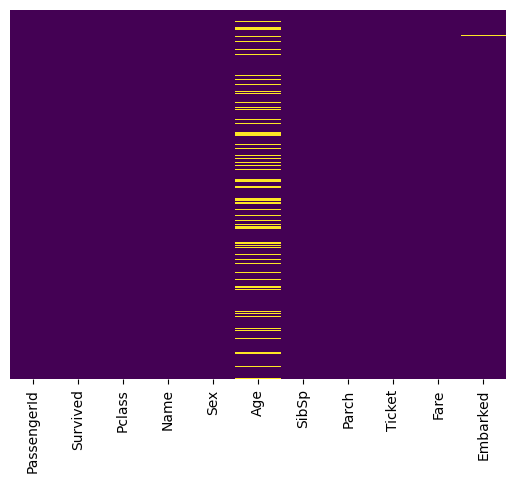

In [3]:
#探索資料
#用heatmap(.isnull()來找出缺失的資料在哪些欄位。Age似乎約有五分之一的資料缺失，可用合理資料補充。)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

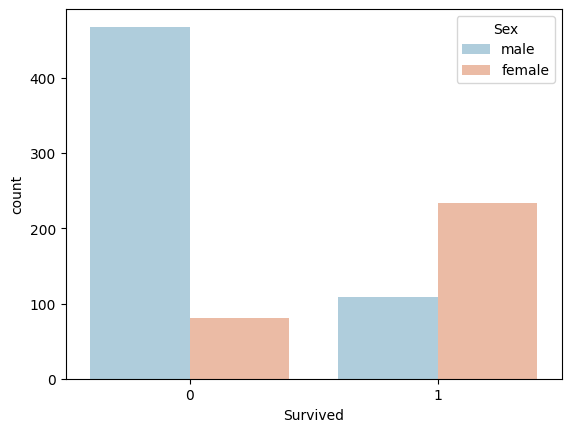

In [4]:
#用countplot來看性別是否影響最後存活。女性存活比例比男性高。
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

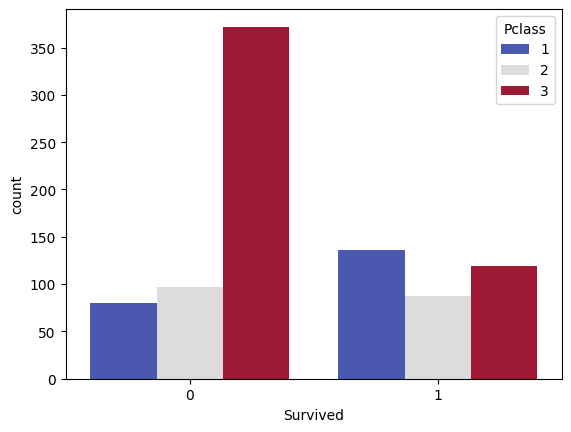

In [5]:
#艙等是否也影響存活?
sns.countplot(x='Survived',hue='Pclass',data=train,palette='coolwarm')

<Axes: xlabel='Age'>

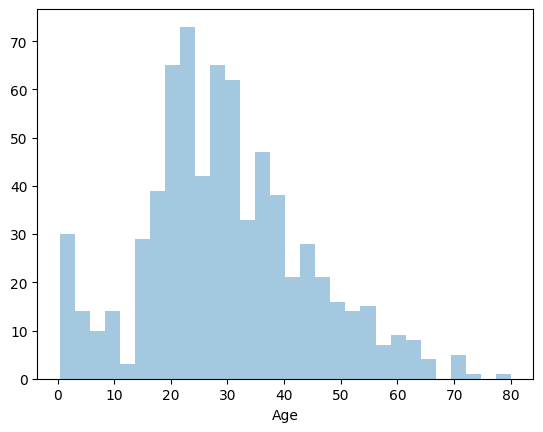

In [7]:
#用直方圖看年齡分佈。缺失資料在此不計。
import warnings
warnings.filterwarnings('ignore')
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

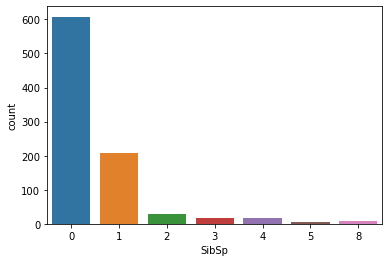

In [7]:
#SibSp代表兄弟姐妹或眷屬人數
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

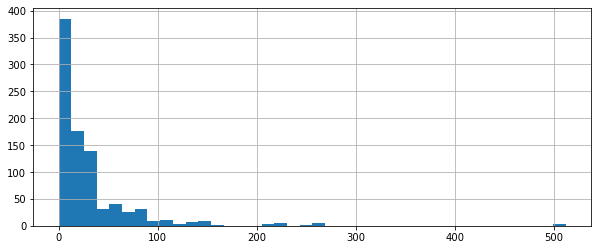

In [8]:
#用直方圖看票價分佈
train['Fare'].hist(bins=40,figsize=(10,4))

<Axes: xlabel='Pclass', ylabel='Age'>

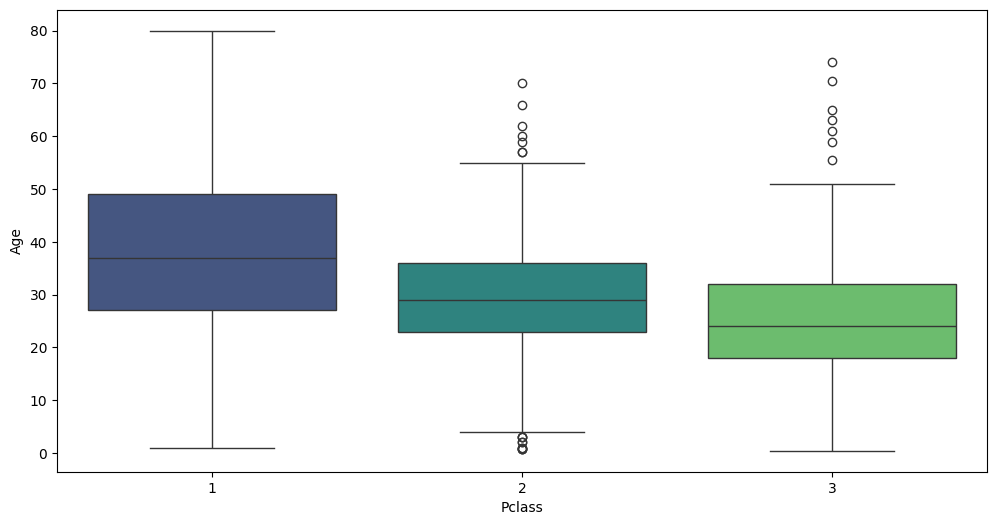

In [10]:
#資料清理
#剛有看到年齡資料約有五分之一缺失，一種做法是棄之不用，一種可以考慮把年齡平均放進去。
#使用盒鬚圖來看年齡和艙等的分佈。看起來頭等艙年齡較高，隨之降低。
plt.figure(figsize=(12,6))
#sns.boxplot(x='Age',y='Pclass',data=train)
sns.boxplot(x='Pclass',y='Age',data=train,palette='viridis')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#print(type(train))
Pclass = train.groupby('Pclass')
Pclass_avg_Age = Pclass['Age'].mean()
Pclass_avg_Age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [20]:
#把艙等平均年齡填入缺失的資料中
#艙等1平均年齡是37，艙等2平均年齡是29，艙等3平均年齡是24
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

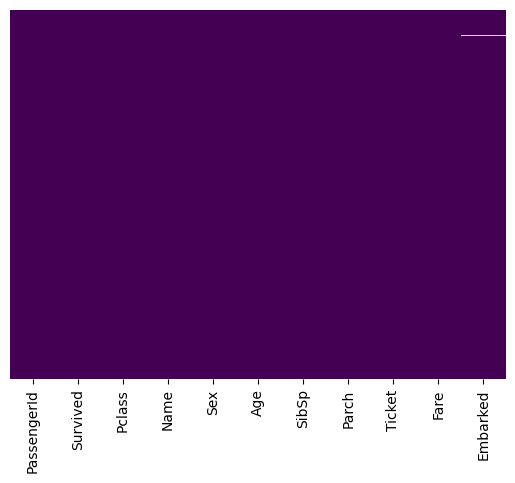

In [21]:
#用heatmap查看年齡是否還有缺失資料
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train.dropna(inplace=True)#inplace： False: 返回新的數據集（默認） True: 在原數據集上操作

<Axes: >

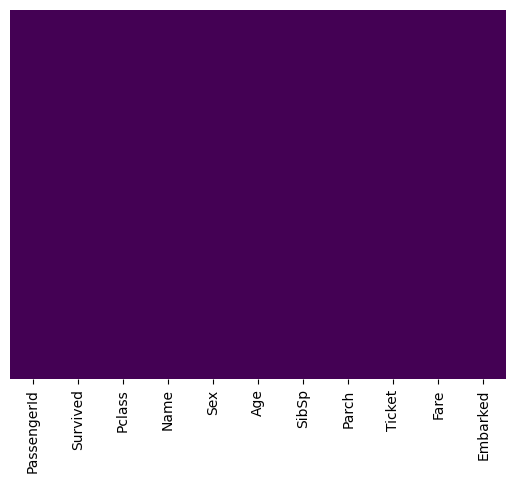

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [26]:
#虛擬變數範例
#使用pandas(d.get_dummies)將性別從類別資料轉為數值變數。
sex = pd.get_dummies(train['Sex'],drop_first=True).astype(int)
#請將drop_first=True，如果為True會刪除第一個類別值。
#本來若有k個level，drop_first=True會只剩下k-1個level，降低共線性的可能
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
#使用pandas將上船的港口從類別資料改換為數值變數(drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True).astype(int)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
#將性別及上船港口的數值變數和原始的data結合
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [29]:
#將原始的性別、登船港口、票號、姓名欄位棄用
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
#因為PassengerId在此也只是排序，因此也棄用
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
#建立feature資料集(選取survived以外所有欄位)與target資料集(survived)
X = train.drop('Survived',axis=1)
y = train['Survived']

In [32]:
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split

In [33]:
#設定隨機種子(random_state)為101，測試組比例佔30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [34]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [52]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression(C=100.0)
logmodel.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [53]:
#使用模型進行測試集資料的預測
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X_train)

In [54]:
#ground truth
print(y_test.values)
print(y_train.values)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 0]
[0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 

#### 計算accuracy及結果顯示
accuracy<br>
error_index #錯誤答案是哪幾筆資料<br>
miss classification #錯誤答案<br>
錯誤欄位的正確之原始資料表格

In [55]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))

train accuracy: 0.7990353697749196
test accuracy: 0.8314606741573034


In [51]:
#error_index2=np.where(predictions2!=y_train.values)[0]
#print('train accuracy:',1-len(error_index2)/len(X_train))
#error_index=np.where(predictions!=y_test.values)[0]
#print('test accuracy:',1-len(error_index)/len(X_test))

train accuracy: 0.8186195826645265
test accuracy: 0.7798507462686567


In [39]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])#錯誤答案
data_index=train.iloc[error_index].index#這裡變數train是所有資料
train.iloc[data_index]#錯誤欄位的正確之原始資料

error_index: [ 25  26  27  35  40  44  57  64  67  70  71  75  80  90  94  97 100 103
 104 105 109 120 122 125 131 134 152 163 171 176 182 189 196 199 206 219
 223 227 234 242 243 247 248 257 263 266]
miss classification : [0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 1]


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
25,1,3,38.0,1,5,31.3875,0,0,1
26,0,3,24.0,0,0,7.2250,1,0,0
27,0,1,19.0,3,2,263.0000,1,0,1
35,0,1,42.0,1,0,52.0000,1,0,1
40,0,3,40.0,1,0,9.4750,0,0,1
44,1,3,19.0,0,0,7.8792,0,1,0
57,0,3,28.5,0,0,7.2292,1,0,0
66,1,2,29.0,0,0,10.5000,0,0,1
69,0,3,26.0,2,0,8.6625,1,0,1
72,0,2,21.0,0,0,73.5000,1,0,1


In [57]:
#from sklearn.model_selection import cross_val_score
#model = LogisticRegression(max_iter=200) 
#scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
#scores 

array([0.7752809 , 0.80898876, 0.80337079, 0.7752809 , 0.81920904])